# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../../PIAIC/CarPrice_Assignment.csv")
dataset.set_index("car_ID", inplace=True)
dataset

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [3]:
dataset.drop("CarName", axis = 1, inplace = True)
dataset

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [4]:
dataset.isnull().sum().sum()

0

In [5]:
dataset.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
dataset.cylindernumber.head(5)

car_ID
1    four
2    four
3     six
4    four
5    five
Name: cylindernumber, dtype: object

In [7]:
# Splitting labels and data
data = dataset.drop("price", axis = 1)
label = dataset.price

In [8]:
# One hot encoding our data
one_hot_data = pd.get_dummies(data)
one_hot_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Splitting our data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(one_hot_data, label, test_size= 0.2, random_state = 42)
len(train_data), len(test_data), len(train_labels), len(test_labels)

(164, 41, 164, 41)

In [10]:
train_data.shape

(164, 52)

In [11]:
train_labels

car_ID
67     18344.0
112    15580.0
154     6918.0
97      7499.0
39      9095.0
        ...   
107    18399.0
15     24565.0
93      6849.0
180    15998.0
103    14399.0
Name: price, Length: 164, dtype: float64

In [36]:
# Building our model

# setting up random seed
tf.random.set_seed(42)

# setting up early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 10)

# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu", input_shape = (train_data.shape[1],)),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(6, activation = "relu"),   
    tf.keras.layers.Dense(1)
])

# 2. Compiling our model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr = 0.01),
#            optimizer = "rmsprop",
             metrics = ["mae"])

# 3. Fitting our mdoel
history = model.fit(train_data, train_labels, epochs = 200, callbacks = callback)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 13238.9009 - mae: 13238.9009
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 12645.0901 - mae: 12645.0901
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 12910.6437 - mae: 12910.6437
Epoch 4/200
6/6 [==============================] - 0s 615us/step - loss: 12041.2010 - mae: 12041.2010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 10182.5689 - mae: 10182.5689
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 6862.9375 - mae: 6862.9375
Epoch 7/200
6/6 [==============================] - 0s 0s/step - loss: 5028.9803 - mae: 5028.9803
Epoch 8/200
6/6 [==============================] - 0s 0s/step - loss: 5637.0587 - mae: 5637.0587
Epoch 9/200
6/6 [==============================] - 0s 0s/step - loss: 4807.9836 - mae: 4807.9836
Epoch 10/200
6/6 [==============================] - 0s 0s/step - loss: 4787.9824 - mae: 4787.9824
Epoch 11/20

6/6 [==============================] - 0s 1ms/step - loss: 2598.8139 - mae: 2598.8139
Epoch 84/200
6/6 [==============================] - 0s 2ms/step - loss: 2659.9288 - mae: 2659.9288
Epoch 85/200
6/6 [==============================] - 0s 2ms/step - loss: 2599.8879 - mae: 2599.8879
Epoch 86/200
6/6 [==============================] - 0s 2ms/step - loss: 2765.9116 - mae: 2765.9116
Epoch 87/200
6/6 [==============================] - 0s 2ms/step - loss: 2385.8866 - mae: 2385.8866
Epoch 88/200
6/6 [==============================] - 0s 2ms/step - loss: 2557.7579 - mae: 2557.7579
Epoch 89/200
6/6 [==============================] - 0s 0s/step - loss: 2707.7408 - mae: 2707.7408
Epoch 90/200
6/6 [==============================] - 0s 2ms/step - loss: 2482.6054 - mae: 2482.6054
Epoch 91/200
6/6 [==============================] - 0s 1ms/step - loss: 2696.0438 - mae: 2696.0438
Epoch 92/200
6/6 [==============================] - 0s 2ms/step - loss: 2860.9318 - mae: 2860.9318
Epoch 93/200
6/6 [======

In [38]:
# 4. Evaluating the model
model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 0s/step - loss: 2180.1445 - mae: 2180.1445


[2180.14453125, 2180.14453125]

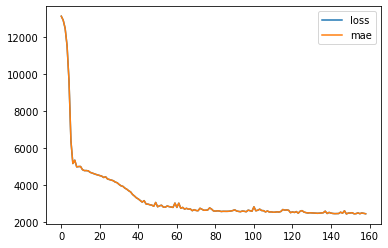

In [39]:
# Visualizing the history
pd.DataFrame(history.history).plot()
plt.show()

In [52]:
y_pred = model.predict(test_data)
pd.DataFrame(y_pred)

,0
0,21699.029297
1,17447.830078
2,9431.351562
3,12045.694336
4,27687.500000
5,7503.741211
6,8385.701172
7,8236.010742
8,10072.163086
9,8170.674805
